# Linear Regression Lab

In [ ]:
import pandas as pd

mtcars = pd.read_csv('/CarPrice_Assignment.csv',index_col=0)
mtcars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 17  bo

In [ ]:
for i in mtcars:
  print('{}:{}'.format(i,mtcars[i].values))

symboling:[ 3  3  1  2  2  2  1  1  1  0  2  0  0  0  1  0  0  0  2  1  0  1  1  1
  1  1  1  1 -1  3  2  2  1  1  1  0  0  0  0  0  0  0  1  0  1  0  2  0
  0  0  1  1  1  1  1  3  3  3  3  1  0  1  0  0  0  0  0 -1 -1  0 -1 -1
  3  0  1  1  2  2  2  1  3  3  3  3  3  1  1  1 -1  1  1  1  1  1  1  1
  1  1  2  0  0  0  0  0  3  3  1  0  0  0  0  0  0  0  0  0  0  0  1  1
  1  1  1 -1  3  3  3  3  3  1  0  2  3  2  3  2  3  2  2  2  2  0  0  0
  0  0  0  0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  1  1  1  1  2
  2  2  2  2  2 -1 -1 -1 -1 -1  3  3 -1 -1  2  2  2  2  2  2  2  3  3  0
  0  0 -2 -1 -2 -1 -2 -1 -1 -1 -1 -1 -1]
CarName:['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 100ls' 'audi 5000'
 'audi 4000' 'audi 5000s (diesel)' 'bmw 320i' 'bmw 320i' 'bmw x1' 'bmw x3'
 'bmw z4' 'bmw x4' 'bmw x5' 'bmw x3' 'chevrolet impala'
 'chevrolet monte carlo' 'chevrolet vega 2300' 'dodge rampage'
 'dodge challenger se' 'dodg

In [ ]:
mtcars.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Part 2: Preprocess data

#### 2.1 Pairwise correlation

<Axes: >

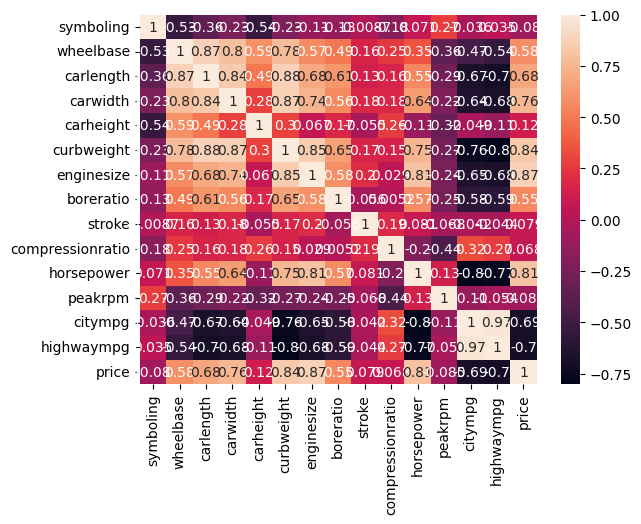

In [ ]:
import seaborn as sns
import pandas as pd
%matplotlib inline

numerical_mtcars = mtcars.select_dtypes(include=['number'])

sns.heatmap(numerical_mtcars.corr(), annot=True)

In [ ]:
numerical_mtcars.corr().price.sort_values(ascending=False)

,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
wheelbase,0.577816
boreratio,0.553173
carheight,0.119336
stroke,0.079443


0.8081388225362212


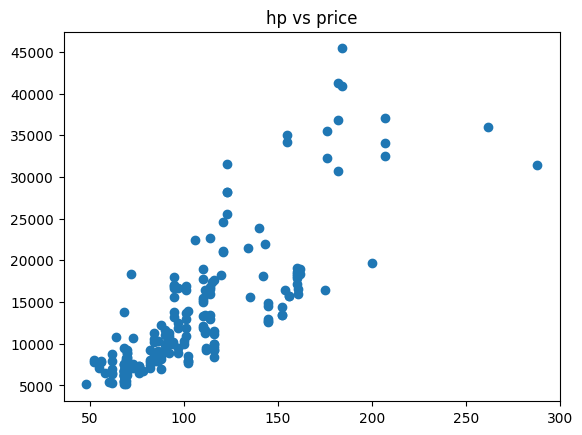

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(numerical_mtcars.horsepower,numerical_mtcars.price)
plt.title('hp vs price')
print(numerical_mtcars.horsepower.corr(numerical_mtcars.price))


#### 2.2 Train/Test separation

Perform hold-out method
- 60% training set
- 40% testing set

In [ ]:
# The mtcars dataset is too small. No need the train/test separation.
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(mtcars[['wt']], mtcars['mpg'], test_size=0.4, random_state=42)

##### X/y separation

In [ ]:
y = mtcars['price']
X = mtcars[['horsepower']]

### Part 3: Train linear regression models

Using scikit-learn

In [ ]:

from sklearn import linear_model as lm

model = lm.LinearRegression() #
results = model.fit(X,y)

intercept = model.intercept_
coefficient = model.coef_
print("y = {0:.2f} + {1:.2f} x".format(intercept, coefficient[0]))

y = -3721.76 + 163.26 x


### Part 4: Model Evaluation

In [ ]:
y_pred = model.predict(X)
y_error = y - y_pred

In [ ]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.653088356490231

In [ ]:
hp = float(input('กีแรงม้า:'))

price = -3721.76 + 163.26*hp

print('ราคาที่ต้องจ่ายกับแรงมาที่ท่านท่านต้องการ :{} $'.format(price))

กีแรงม้า:60
ราคาที่ต้องจ่ายกับแรงมาที่ท่านท่านต้องการ :6073.839999999998 $


## Alternative training method (Part 3 & 4)

Using statsmodels

In [ ]:
import statsmodels.api as sm

model2 = sm.OLS(y,X).fit() #ordinary least square
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              1854.
Date:                Thu, 26 Dec 2024   Prob (F-statistic):                   2.43e-104
Time:                        15:20:25   Log-Likelihood:                         -2031.7
No. Observations:                 205   AIC:                                      4065.
Df Residuals:                     204   BIC:                                      4069.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower   132.0043      3.066     43.055      0.000     125.959     138.049
==============================================================================
Omnibus:                       83.232   Durbin-Watson:                   0.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.121
Skew:                           1.804   Prob(JB):                     7.92e-50
Kurtosis:                       6.667   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#ใช้stat model แบบเพิ่ม constnat
Xc = sm.add_constant(X)
model3 = sm.OLS(y,Xc).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           1.48e-48
Time:                        15:21:14   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3721.7615    929.849     -4.003      0.000   -5555.163   -1888.360
horsepower   163.2631      8.351     19.549      0.000     146.796     179.730
==============================================================================
Omnibus:                       47.741   Durbin-Watson:                   0.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.702
Skew:                           1.141   Prob(JB):                     1.22e-20
Kurtosis:                       5.352   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# การพิสูจน์ว่าโมเดลเป็น Linear จริงๆ

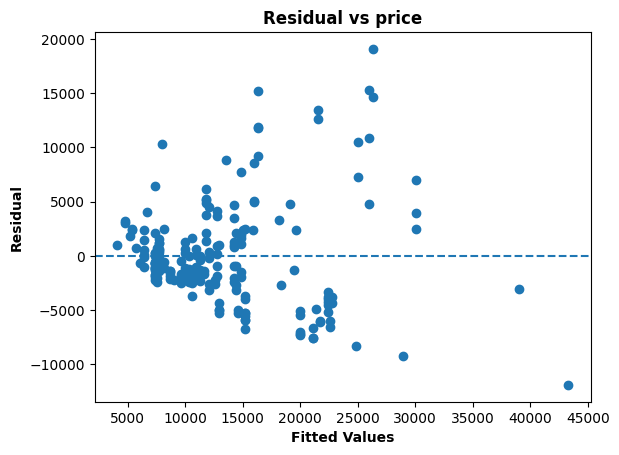

In [ ]:
#L & E
plt.scatter(y_pred, y_error) #สร้างกราฟแบบจุด
plt.title("Residual vs price", fontsize=12, fontweight='bold')
plt.axhline(y=0, linestyle='--')
plt.xlabel("Fitted Values", fontweight='bold')
plt.ylabel("Residual", fontweight='bold')
plt.show() #แสดงกราฟ

In [ ]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Example data
# Independent variable (X) and dependent variable (Y)

# Add a constant to the independent variable for the intercept
X_with_constant = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X_with_constant).fit()

# Get the residuals from the model
residuals = model.resid

# Perform the Durbin-Watson test
dw_statistic = durbin_watson(residuals)

# Output the result
print(f"Durbin-Watson statistic: {dw_statistic}")

# Interpretation guide:
# - DW ≈ 2: No autocorrelation
# - DW < 2: Positive autocorrelation
# - DW > 2: Negative autocorrelation


Durbin-Watson statistic: 0.7922948566397596


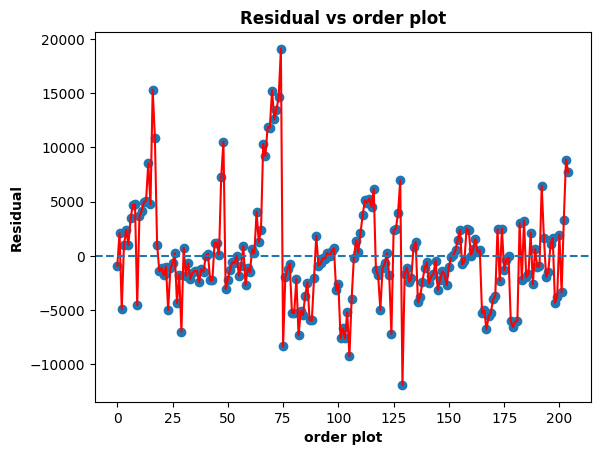

In [ ]:
#I
plt.scatter(range(len(y_error)), y_error) #สร้างกราฟแบบจุด
plt.plot(range(len(y_error)), y_error, color='r') #สร้างกราฟแบบเส้น
plt.title("Residual vs order plot", fontsize=12, fontweight='bold')
plt.axhline(y=0, linestyle='--')
plt.xlabel("order plot", fontweight='bold')
plt.ylabel("Residual", fontweight='bold')
plt.show() #แสดงกราฟ

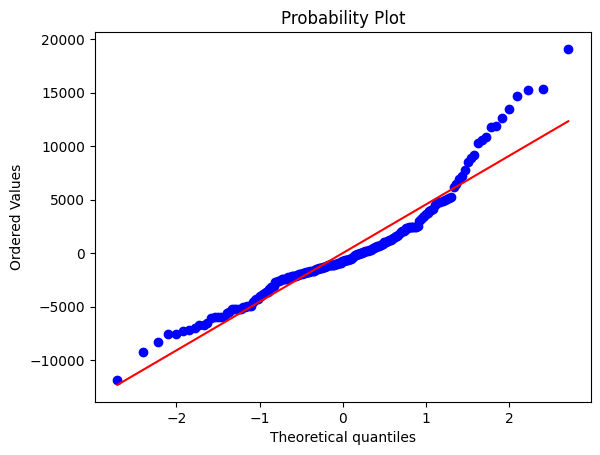

In [ ]:
#N
#N
import scipy.stats as scipystats #นำเข้า library scipystats
import pylab #นำเข้า library pylab

# Add a constant to X before prediction
X_with_constant = sm.add_constant(X)

elem1res = pd.concat([mtcars, pd.Series(y_error, name = 'resid'), pd.Series(model.predict(X_with_constant), name = "predict")], axis = 1) #นำเอาค่า y_error และ y_pred มารวมกัน
scipystats.probplot(elem1res.resid, dist="norm", plot=pylab) #สร้างกราฟแบบจุด
pylab.show() #แสดงกราฟ

In [ ]:
elem1res

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,resid,predict
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,-905.438273,14400.438273
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,2099.561727,14400.438273
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,-4920.749895,21420.749895
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,1018.929275,12931.070725
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,2396.509483,15053.490517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114,5400,23,28,16845.0,1954.772544,14890.227456
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,-3355.328261,22400.328261
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134,5500,18,23,21485.0,3329.511324,18155.488676


In [ ]:
model3.summary()
#

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           1.48e-48
Time:                        15:23:24   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3721.7615    929.849     -4.003      0.000   -5555.163   -1888.360
horsepower   163.2631      8.351     19.549      0.000     146.796     179.730
==============================================================================
Omnibus:                       47.741   Durbin-Watson:                   0.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.702
Skew:                           1.141   Prob(JB):                     1.22e-20
Kurtosis:                       5.352   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""